In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize, fmin_bfgs
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import pickle
%matplotlib inline

In [3]:
alldata = np.array( pickle.load( open( "market-data.p", "rb" ) ) )

In [77]:

alldata=np.zeros((105,1))
for year in range(1993,2015) :
    with open('retail-truth-'+str(year)+'.csv', 'rU') as csvfile:
        reader = csv.reader(csvfile, delimiter=',',quotechar='\"')
        lines=[]
        for row in reader:
            lines.append(row)
        lines=np.array(lines)[6:]

        data = lines[:,2:]
        ndata=[]
        for row in data :
            nrow=[]
            for v in row :
                if v=='(NA)' or v=='' or v=='(S)' or v=='.' :
                    nrow.append(-1)
                else :
                    nrow.append(int(v.replace(',','')))
            ndata.append(nrow)
        ndata=np.array(ndata)[:105,:12]
        print alldata.shape,ndata.shape
        alldata=np.concatenate((alldata,ndata),axis=1)

(105, 1) (105, 12)
(105, 13) (105, 12)
(105, 25) (105, 12)
(105, 37) (105, 12)
(105, 49) (105, 12)
(105, 61) (105, 12)
(105, 73) (105, 12)
(105, 85) (105, 12)
(105, 97) (105, 12)
(105, 109) (105, 12)
(105, 121) (105, 12)
(105, 133) (105, 12)
(105, 145) (105, 12)
(105, 157) (105, 12)
(105, 169) (105, 12)
(105, 181) (105, 12)
(105, 193) (105, 12)
(105, 205) (105, 12)
(105, 217) (105, 12)
(105, 229) (105, 12)
(105, 241) (105, 12)
(105, 253) (105, 12)


In [78]:
graph_labels = ['retail and food','motor vehicles and parts','alcohol','gas stations','mens clothes','womens clothes','jewelery stores']
alldata2=[alldata[0],alldata[5],alldata[29],alldata[32],alldata[35],alldata[36],alldata[40]]

retail and food


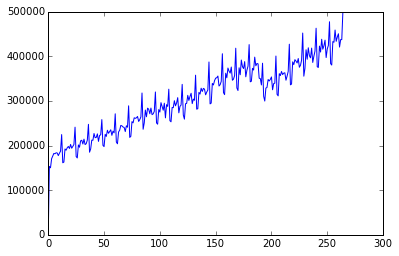

motor vehicles and parts


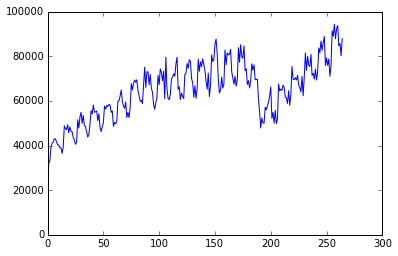

alcohol


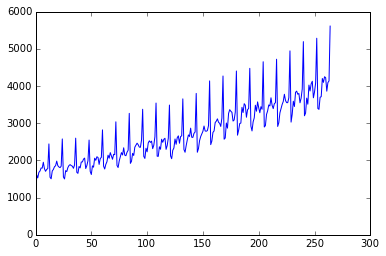

gas stations


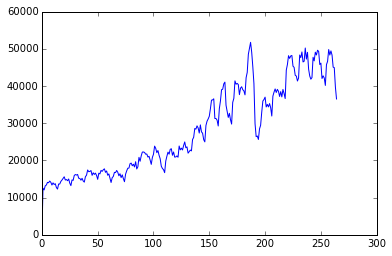

mens clothes


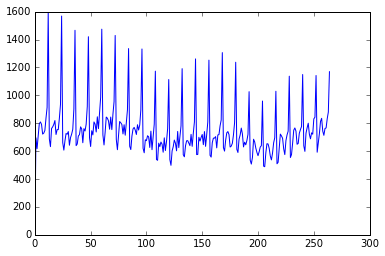

womens clothes


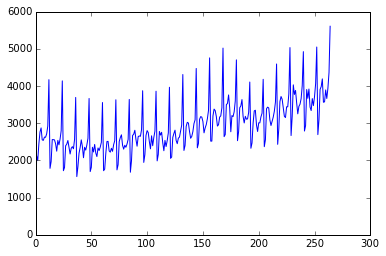

jewelery stores


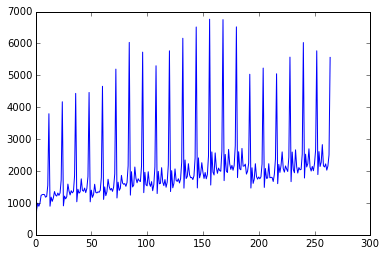

In [79]:
for i in range(len(alldata2)) :
    print graph_labels[i]
    plt.plot(alldata2[i])
    plt.show()

# set baseline as january and ask what percentage of january average each month is

In [5]:
seasonality=[]
for series in alldata2 :
    avgpctlist=[[],[],[],[],[],[],[],[],[],[],[],[]]
    for i in range(len(series)) :
        pct = (series[i]-series[i/12*12]) / series[i/12*12]
        avgpctlist[i%12].append(pct)

    avgpct=[]
    for row in avgpctlist :
        avg = np.average(row[1:])
        avgpct.append(avg)
        
    seasonality.append(avgpct)

In [39]:
alldata = [10+np.sin(np.arange(100)*2.*np.pi/12.)]

In [80]:
alldata3=[] # percent seasonality
for i in range(len(alldata2)) :
    avgpctlist=[[],[],[],[],[],[],[],[],[],[],[],[]]
    nrow=[]
    for j in range(len(alldata2[i])) :
        pct = (alldata2[i][j]-alldata2[i][j/12*12]) / alldata2[i][j/12*12]
        avgpctlist[j%12].append(pct)
        
        corr = alldata2[i][j]-np.average(avgpctlist[j%12][1:])*alldata2[i][j/12*12]
        nrow.append(corr)
    alldata3.append(nrow)

In [54]:
alldata3=[] # differencing seasonality
for i in range(len(alldata)) :
    avgpctlist=[[],[],[],[],[],[],[],[],[],[],[],[]]
    nrow=[]
    for j in range(len(alldata[i])) :
        pct = (alldata[i][j]-alldata[i][j/12*12])
        avgpctlist[j%12].append(pct)
        
        corr = alldata[i][j]-np.average(avgpctlist[j%12][1:])
        nrow.append(corr)
    alldata3.append(nrow)

In [48]:
np.array(ndata)

array([[             nan,              nan,              nan, ...,
         458716.28571429,  462586.42857143,  477278.        ],
       [             nan,              nan,              nan, ...,
         383543.9047619 ,  386084.33333333,  398511.        ],
       [             nan,              nan,              nan, ...,
         413748.80952381,  416861.14285714,  430736.        ],
       ..., 
       [             nan,              nan,              nan, ...,
          27890.38095238,   27862.0952381 ,   29699.        ],
       [             nan,              nan,              nan, ...,
           3087.85714286,    3345.80952381,    3760.        ],
       [             nan,              nan,              nan, ...,
          44793.42857143,   45514.0952381 ,   46218.        ]])

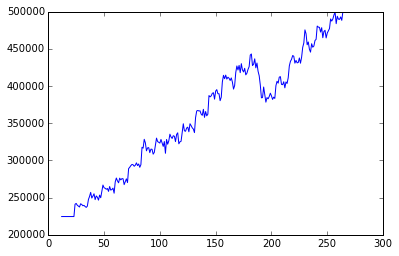

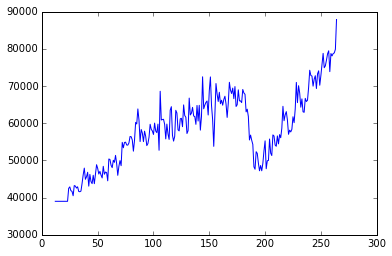

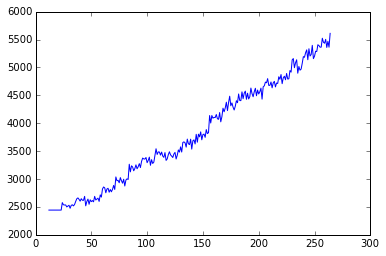

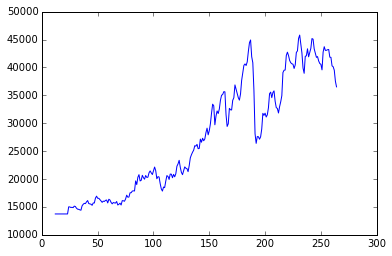

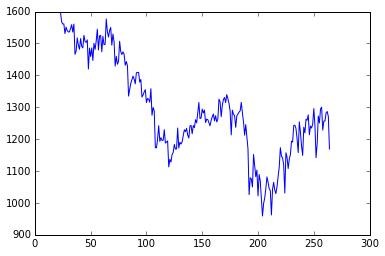

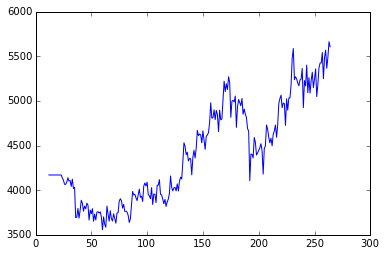

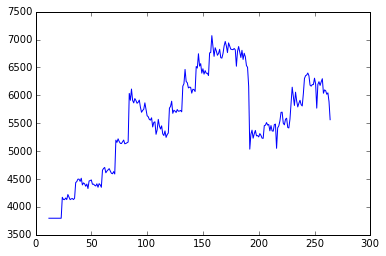

In [81]:
for i in range(len(alldata3)) :
    plt.plot(alldata3[i])
    #plt.plot(alldata[i]-100000)
    plt.show()

In [100]:
alldata4=[]
for i in range(len(alldata3)) :
    row=[]
    for j in range(25,len(alldata3[i])) :
        avg=np.average(alldata3[i][j-12:j])
        nval=alldata3[i][j]-avg
        row.append(nval)
    alldata4.append(row)

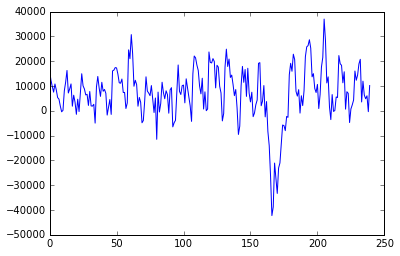

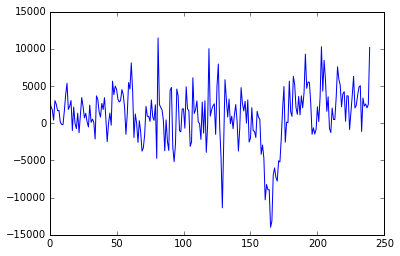

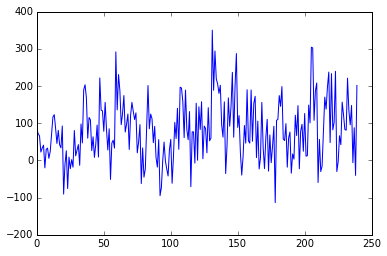

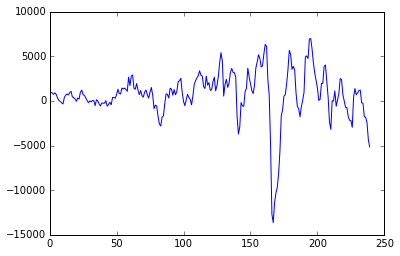

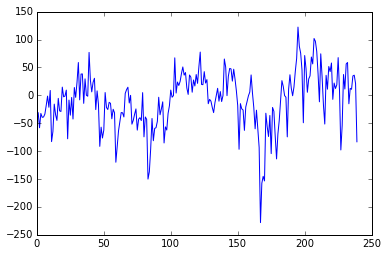

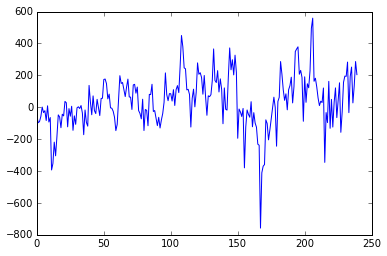

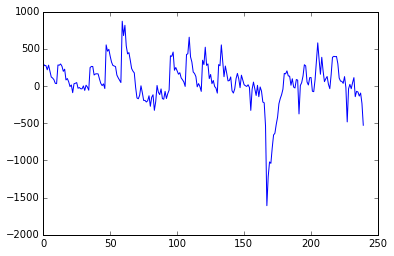

In [101]:
for i in range(len(alldata4)) :
    plt.plot(alldata4[i])
    #plt.plot(alldata[i]-100000)
    plt.show()

In [102]:
alldata5=[] # differencing seasonality
for i in range(len(alldata4)) :
    avgpctlist=[[],[],[],[],[],[],[],[],[],[],[],[]]
    nrow=[]
    for j in range(len(alldata4[i])) :
        pct = (alldata4[i][j]-alldata4[i][j/12*12])
        avgpctlist[j%12].append(pct)
        
        corr = alldata4[i][j]-np.average(avgpctlist[j%12][1:])
        nrow.append(corr)
    alldata5.append(nrow)

In [103]:
alldata5

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  11592.900482981902,
  14944.319742162828,
  10163.764804752354,
  14083.276035026749,
  12063.754872335339,
  11177.700509101516,
  13425.974958421837,
  14020.151906056562,
  12525.141747138274,
  14922.267725960919,
  12238.517689434142,
  10938.619974933841,
  14564.470867625059,
  13848.334168969945,
  10827.932583474467,
  12010.024340055057,
  16050.031873096759,
  12884.199904611614,
  17859.824778677663,
  13486.561851097347,
  10508.127973453133,
  14206.532722617529,
  14068.808421189684,
  14245.730442537044,
  18619.400099918148,
  16399.917060405074,
  18383.157768510944,
  21723.792826097248,
  18620.581208521944,
  16323.015963852893,
  19381.360459

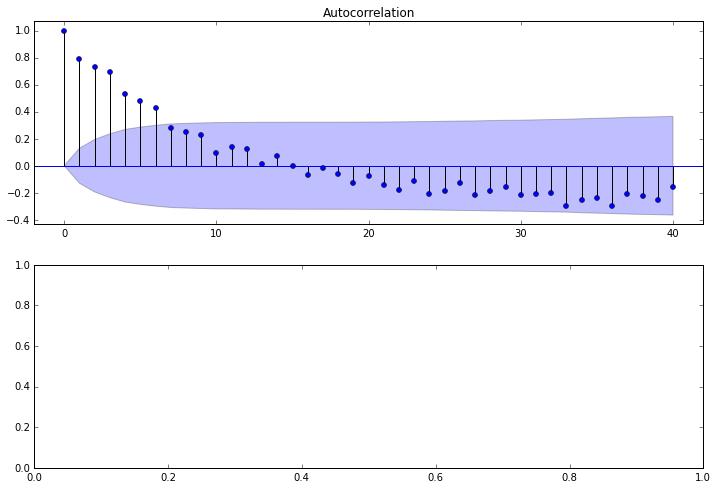

In [108]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(alldata4[0], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(alldata5[0][12:], lags=40, ax=ax1)

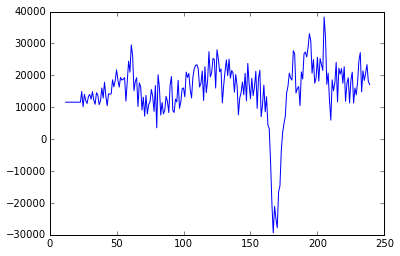

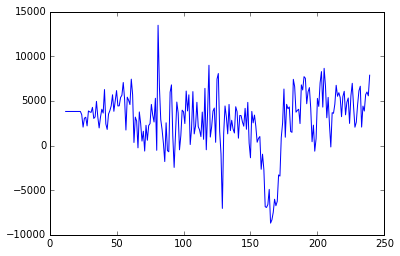

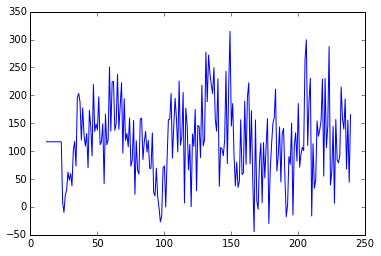

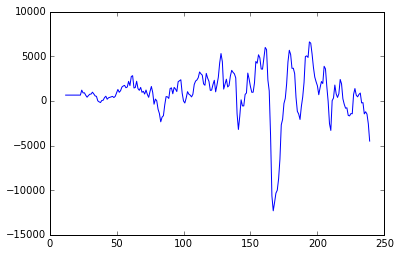

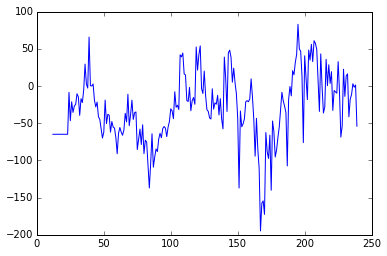

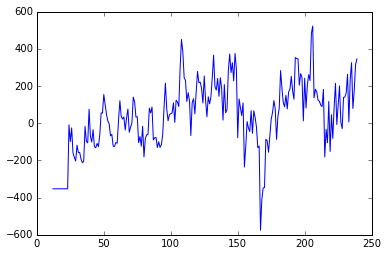

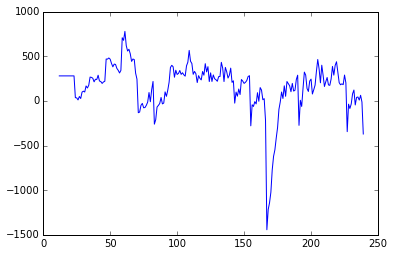

In [105]:
for i in range(len(alldata5)) :
    plt.plot(alldata5[i])
    #plt.plot(alldata[i]-100000)
    plt.show()

In [111]:
alldata3=[]
for i in range(len(alldata2)) :
    row=[]
    for j in range(25,len(alldata2[i])) :
        avg=np.average(alldata2[i][j-12:j])
        nval=alldata2[i][j]-avg
        row.append(nval)
    alldata3.append(row)

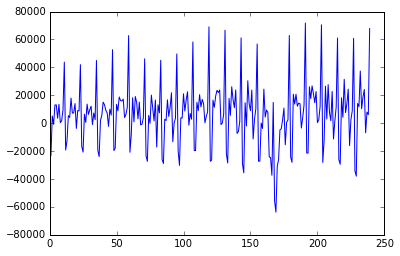

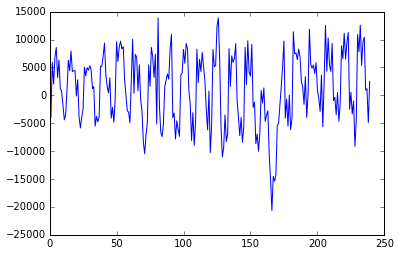

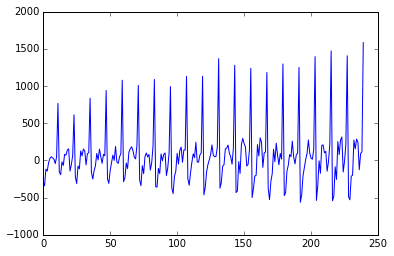

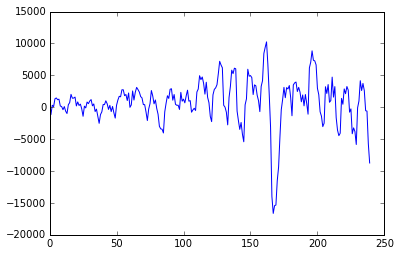

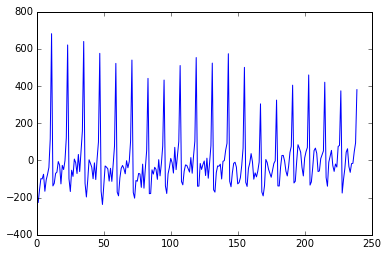

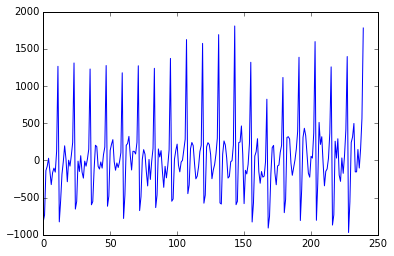

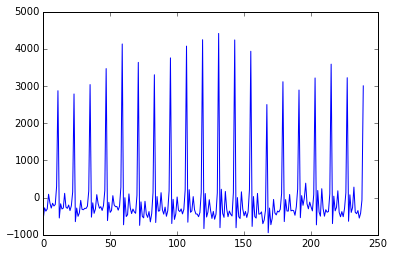

In [113]:
for i in range(len(alldata3)) :
    plt.plot(alldata3[i])
    plt.show()

In [115]:
alldata4=[] # differencing seasonality
for i in range(len(alldata3)) :
    avgpctlist=[[],[],[],[],[],[],[],[],[],[],[],[]]
    nrow=[]
    for j in range(len(alldata3[i])) :
        pct = (alldata3[i][j]-alldata3[i][j/12*12])
        avgpctlist[j%12].append(pct)
        
        corr = alldata3[i][j]-np.average(avgpctlist[j%12][1:])
        nrow.append(corr)
    alldata4.append(nrow)

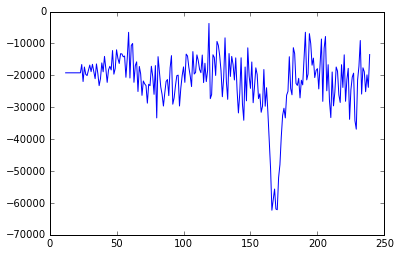

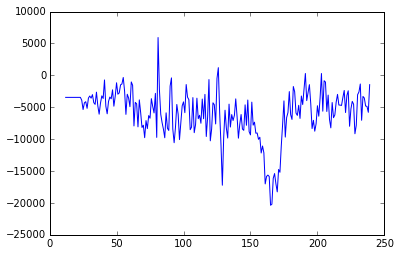

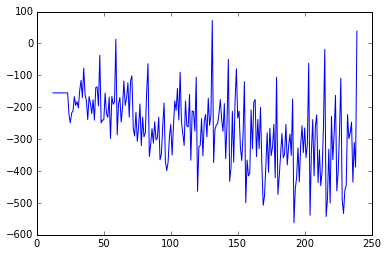

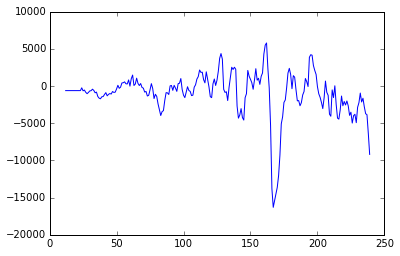

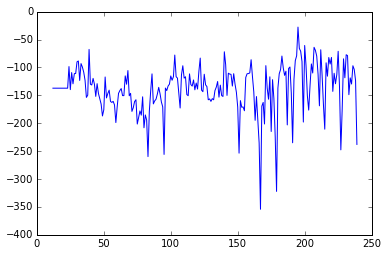

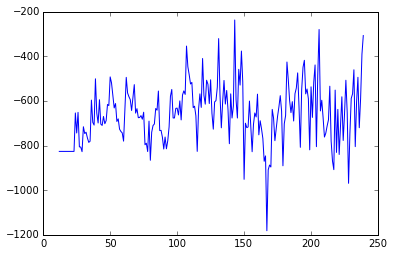

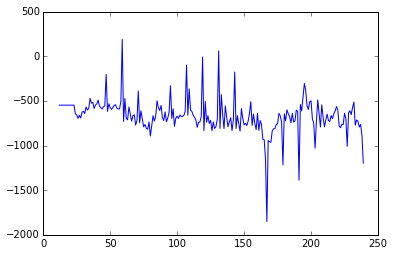

In [116]:
for i in range(len(alldata4)) :
    plt.plot(alldata4[i])
    plt.show()